final project
===
due: June 30 2022

authors: pegler, prüwasser, scheftner

## Dataset 2: IQ and creativity

Jauk, E., Benedek, M., Dunst, B., & Neubauer, A. C. (2013). The relationship between intelligence and creativity: New support for the threshold hypothesis by means of empirical breakpoint detection. Intelligence, 41(4), 212-221. http://dx.doi.org/10.1016/j.intell.2013.03.003

* Material: https://osf.io/hzpgy/

### Description

The relationship between intelligence and creativity: New support for the threshold hypothesis by means of empirical breakpoint detection 

#### Abstract

The relationship between intelligence and creativity has been subject to empirical research for decades. Nevertheless, there is yet no consensus on how these constructs are related. One of the most prominent notions concerning the interplay between intelligence and creativity is the threshold hypothesis, which assumes that above-average intelligence represents a necessary condition for high-level creativity. While earlier research mostly supported the threshold hypothesis, it has come under fire in recent investigations. The threshold hypothesis is commonly investigated by splitting a sample at a given threshold (e.g., at 120 IQ points) and estimating separate correlations for lower and upper IQ ranges. However, there is no compelling reason why the threshold should be fixed at an IQ of 120, and to date, no attempts have been made to detect the threshold empirically. Therefore, this study examined the relationship between intelligence and different indicators of creative potential and of creative achievement by means of segmented regression analysis in a sample of 297 participants. Segmented regression allows for the detection of a threshold in continuous data by means of iterative computational algorithms. We found thresholds only for measures of creative potential but not for creative achievement. For the former the thresholds varied as a function of criteria: When investigating a liberal criterion of ideational originality (i.e., two original ideas), a threshold was detected at around 100 IQ points. In contrast, a threshold of 120 IQ points emerged when the criterion was more demanding (i.e., many original ideas). Moreover, an IQ of around 85 IQ points was found to form the threshold for a purely quantitative measure of creative potential (i.e., ideational fluency). These results confirm the threshold hypothesis for qualitative indicators of creative potential and may explain some of the observed discrepancies in previous research. In addition, we obtained evidence that once the intelligence threshold is met, personality factors become more predictive for creativity. On the contrary, no threshold was found for creative achievement, i.e. creative achievement benefits from higher intelligence even at fairly high levels of intellectual ability.

<div class="alert alert-info">Contrary to the research question in this paper, we did not define the two forms of creativity - Creative Performance (CP) and Creative Achievement (CA) - as the dependent variables and IQ as the predictor variable. In our exploratory data analysis, we went the opposite way, using IQ as the dependent variable and CP and CA as the predictors in various regression models.</div>



<div class="alert alert-warning">Still to add: Significance of results (p-values or CIs) in written form.</div>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("data/final_data/fromjauketal2013.csv")
df = df.dropna(how="any") # drop observations with missing values in any of the columns
df = df.rename(columns={"CP_avgOriginality":"CP"}) # for easier handling
df["CP_x_CA"] = df["CP"] * df["CA"] # adding interaction

## Data exploration

In [111]:
df.head()

,IQ,CP,CA,CP_x_CA
0,124.571647,1.747612,110.0,192.237269
1,111.313106,1.916540,64.0,122.658586
2,115.698623,1.837332,52.0,95.541246
3,111.976033,1.879630,6.0,11.277778
4,112.078021,1.773148,40.0,70.925926


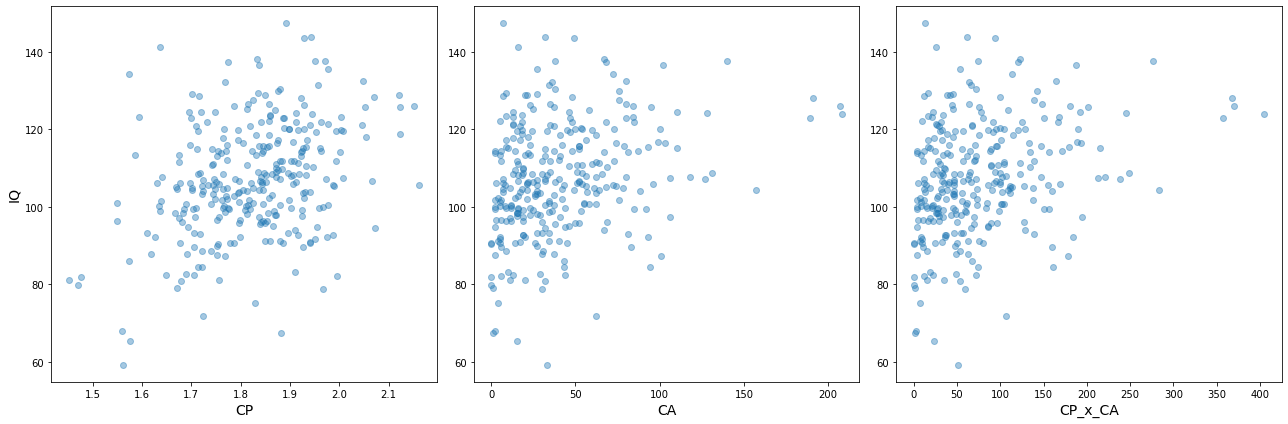

In [112]:
y_name = "IQ"
x_names = list(df.drop([y_name], axis = 1))

plt.subplots(1, 3, figsize = (18, 6))

for i, x_name in enumerate(x_names):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x = df[x_name], y = df[y_name], alpha = 0.4)
    plt.xlabel(x_name, fontsize=14)
    if i == 0:
        plt.ylabel(y_name, fontsize=14)
plt.tight_layout()

/home/user/miniconda3/envs/py39/lib/python3.9/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


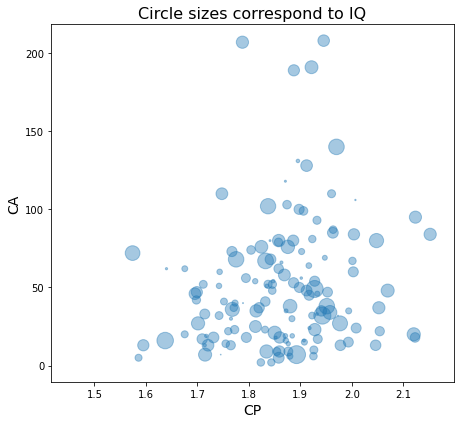

In [113]:
plt.figure(figsize=(6.5, 6))
plt.scatter(x = df[x_names[0]], y = df[x_names[1]], alpha = 0.4, s=8*(df[y_name]-df[y_name].mean()))
plt.xlabel(x_names[0], fontsize=14)
plt.ylabel(x_names[1], fontsize=14)
plt.title("Circle sizes correspond to IQ", fontsize=16)
plt.tight_layout()

In [114]:
corr_Xy = df.corr()[[y_name]].sort_values(y_name).drop(y_name,axis = 0)
corr_Xy

,IQ
CA,0.281401
CP_x_CA,0.298401
CP,0.352167


## Linear Regression

### Adding 1st predictor: **CP**

intercept:     29.894
coefficients: [42.406]
R²:            0.124
p:                         



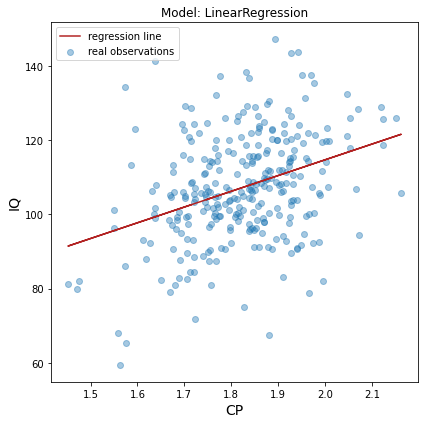

In [155]:
x_name = "CP"
X = df[[x_name]].values
y = df[["IQ"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")
print(f"p:                         ")
print()

# for regression line plot
y_pred = linreg.predict(X)

# plot
plt.figure(figsize=(6, 6))
plt.plot(X, y_pred, c = "firebrick", label = "regression line")
plt.scatter(X, y, alpha = 0.4, label = "real observations")
plt.ylabel(y_name, fontsize=14)
plt.xlabel(x_name, fontsize=14)
plt.title("Model: " + str(linreg)[:-2])
plt.legend()
plt.tight_layout();

### Adding 2nd predictor: **CA**

In [170]:
X = df[["CP", "CA"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")

intercept:     36.156
coefficients: [36.951  0.09 ]
R²:            0.169


### Adding 3rd predictor: **Interaction CP*CA**

In [171]:
X = df[["CP", "CA", "CP_x_CA"]].values

linreg = LinearRegression()
res = linreg.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_[0], 3))
print(f"R²:           {score: ,.3f}")

intercept:     32.840
coefficients: [38.757  0.187 -0.052]
R²:            0.169


### Sequence of predictor inclusion by correlation

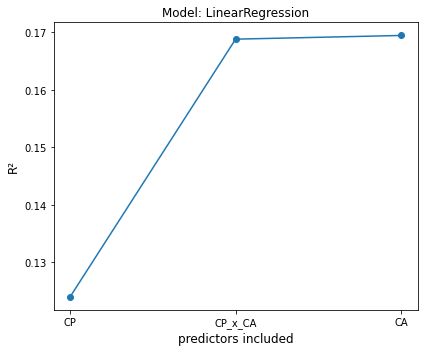

In [172]:
corr_Xy_abs = corr_Xy.abs().sort_values(y_name, ascending=False)
x_names_corr = list(corr_Xy_abs.T)

scores = []

for i, x_name in enumerate(x_names_corr):

    reg = LinearRegression()
    reg.fit(df[x_names_corr[:i + 1]], df[y_name])
    scores.append(reg.score(df[x_names_corr[:i + 1]], df[y_name]))

plt.figure(figsize=(6, 5))
plt.plot(x_names_corr, scores, marker = "o")
#plt.xticks(rotation = 45, ha = "right")
plt.xlabel("predictors included", fontsize=12)
plt.ylabel("R²", fontsize=12)
plt.title("Model: " + str(reg)[:-2])
#plt.grid()
plt.tight_layout();

### Bootstrapping with 1 Regressor

#### 1 Bootstrap of lin. Reg. with CP as predictor of IQ

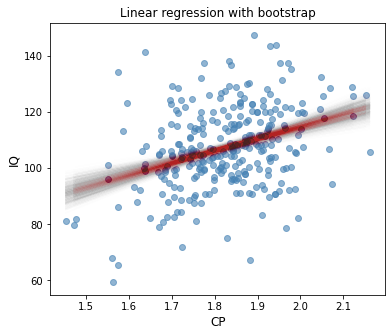

In [128]:
from scipy import stats, linalg
np.random.seed(0)

n = len(df)
n_sim = 1_000
cp = df['CP'].values
ca = df['CA'].values
y = df['IQ'].values


plt.figure(figsize=(6, 5))

for i in range(n_sim):
    rand_id = np.random.choice(n, n)
    bs_cp = np.array([cp[i] for i in rand_id])
    bs_y = np.array([y[i] for i in rand_id])
    bs_x_mat = np.column_stack([np.ones(n), bs_cp])
    res = linalg.lstsq(bs_x_mat, bs_y)
    bs_pred_y = np.array([res[0][0] + res[0][1] * bs_cp[i] for i in range(n)])
    plt.plot(bs_cp, bs_pred_y, c="firebrick", alpha=0.005)

plt.scatter(cp, y, color="steelblue", alpha=0.6)
plt.xlabel("CP", fontsize=12)
plt.ylabel("IQ", fontsize=12)
plt.title("Linear regression with bootstrap", fontsize=12);

##### Compare with `seaborn.regplot()`

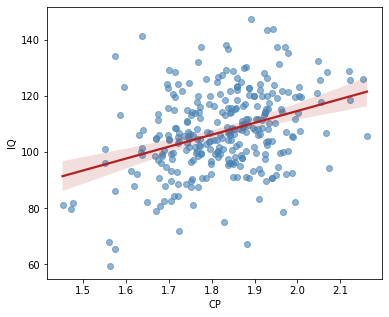

In [129]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.regplot(data=df, x="CP", y="IQ", color="steelblue", scatter_kws={"alpha":0.6}, line_kws={"color":"firebrick"});

#### 2 Bootstrap of lin. Reg. with CA as predictor of IQ

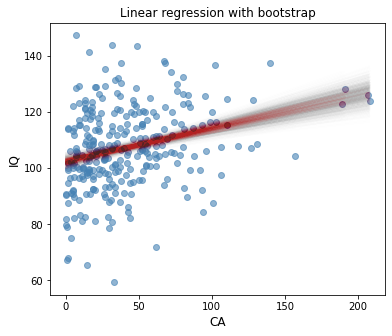

In [134]:
np.random.seed(0)

plt.figure(figsize=(6, 5))

for i in range(n_sim):
    rand_id = np.random.choice(n, n)
    bs_ca = np.array([ca[i] for i in rand_id])
    bs_y = np.array([y[i] for i in rand_id])
    bs_x_mat = np.column_stack([np.ones(n), bs_ca])
    res = linalg.lstsq(bs_x_mat, bs_y)
    bs_pred_y = np.array([res[0][0] + res[0][1] * bs_ca[i] for i in range(n)])
    plt.plot(bs_ca, bs_pred_y, c="firebrick", alpha=0.005)

plt.scatter(ca, y, color="steelblue", alpha=0.6)
plt.xlabel("CA", fontsize=12)
plt.ylabel("IQ", fontsize=12)
plt.title("Linear regression with bootstrap", fontsize=12);

##### Compare with `seaborn.regplot()`

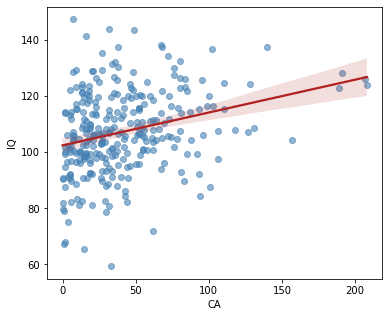

In [135]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.regplot(data=df, x="CA", y="IQ", color="steelblue", scatter_kws={"alpha":0.6}, line_kws={"color":"firebrick"});

## Machine learning methods

* Interaction variable removed
* model is not fitted on the entire data set (fit on training data, predictions on test data)
* 2 methods are used: Regularized linear regression (Elastic Net) and Random Forests
* Cross validation implemented: outer loop to prevent over-fitting, inner loop for hyperparameter tuning

In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor


# cross validation constants
N_OUTER_SPLITS = 20
N_INNER_SPLITS = 50


# train test split function
def split_train_test(data, i_train, i_test):
    train = data.iloc[i_train, :]
    test = data.iloc[i_test, :]
    return train, test


# prepare data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df[df.columns.drop(["CP_x_CA", y_name])]), columns=df.columns.drop(["CP_x_CA", y_name]))
y = df[[y_name]]

### Elastic Net

In [144]:
from scipy.stats import loguniform, uniform
import warnings

warnings.filterwarnings("ignore")

reg = ElasticNet()

hyper_space = {
    "alpha": loguniform(1e-4,1e3),
    "l1_ratio": uniform(1e-3,1.0)
    }

outer_cv = ShuffleSplit(n_splits=N_OUTER_SPLITS, test_size=0.2)    

best_model = None
best_score = None

# iterate over outer CV splitter
for i_cv, (i_train, i_test) in enumerate(outer_cv.split(X, y), start=1):

    y_train, y_test = split_train_test(y, i_train, i_test)
    X_train, X_test = split_train_test(X, i_train, i_test)

    # nested CV with parameter optimization
    inner_cv = ShuffleSplit(n_splits=N_INNER_SPLITS,
                                 test_size=0.2)   
    search_reg = RandomizedSearchCV(
        estimator=reg,
        param_distributions=hyper_space,
        n_iter=1000,
        cv=inner_cv,
        n_jobs=-2,
    )

    result = search_reg.fit(X_train, y_train.values.ravel())
    score = result.score(X_test, y_test)

    print(f"Epoch {str(i_cv).rjust(2)}/{N_OUTER_SPLITS}:", f"R² = {score: ,.4f}, Model =", result.best_estimator_)
    
    if best_model == None:
        best_model = result.best_estimator_
        best_score = score
    else:
        if (score > best_score) | (best_model == None):
            best_model = result.best_estimator_
            best_score = score       

print(50*"-")
print("Best model: ", f"R² = {best_score: ,.4f}, Model =", best_model)

Epoch  1/20: R² =  0.1184, Model = ElasticNet(alpha=0.12414521394125452, l1_ratio=0.05794805150208027)
Epoch  2/20: R² =  0.1742, Model = ElasticNet(alpha=0.08202026009226163, l1_ratio=0.012566927224509694)
Epoch  3/20: R² =  0.2785, Model = ElasticNet(alpha=0.09182111549267612, l1_ratio=0.005151305648035675)
Epoch  4/20: R² =  0.0560, Model = ElasticNet(alpha=0.029594712900561378, l1_ratio=0.00137357468181487)
Epoch  5/20: R² =  0.0720, Model = ElasticNet(alpha=0.16299315058280311, l1_ratio=0.003542457268635334)
Epoch  6/20: R² =  0.1401, Model = ElasticNet(alpha=0.17454705021026598, l1_ratio=0.10106726264923482)
Epoch  7/20: R² =  0.1154, Model = ElasticNet(alpha=0.00010087657552964136, l1_ratio=0.04467962948971771)
Epoch  8/20: R² =  0.2643, Model = ElasticNet(alpha=0.04152171946242429, l1_ratio=0.003533804338970991)
Epoch  9/20: R² =  0.0824, Model = ElasticNet(alpha=0.10391458305607316, l1_ratio=0.05425119804133871)
Epoch 10/20: R² =  0.1514, Model = ElasticNet(alpha=0.14675040642

In [255]:
best_model = ElasticNet(alpha=0.09182111549267612, l1_ratio=0.005151305648035675) # close to 0 means L2 penalty (Ridge)
res = best_model.fit(X, y)
score = res.score(X, y)

print(f"intercept:    {res.intercept_[0]: ,.3f}")
print("coefficients:", np.round(res.coef_, 3))
print(f"R²:           {score: ,.3f}")

intercept:     107.214
coefficients: [4.144 2.974]
R²:            0.168


Classic linear regression gave us:

    intercept:     36.156
    coefficients: [36.951  0.09 ]
    R²:            0.169

<div class="alert alert-info"><ul>
    <li>First we trained a model on the training data, the R² scores showed us how good the predictions were on the test data.</li>
        <li>Then for comparison with classic linear regression we fit the best model on the entire data and compute R² and coefficients</li>
    </ul></div>

### Random forest

In [163]:
reg = RandomForestRegressor(n_estimators=256, random_state=0)


hyper_space = {
    "max_features": uniform(1e-2, 1e0),
    "min_samples_split": list(range(2, 256)),
    "min_samples_leaf": list(range(2, 256)),
    }

outer_cv = ShuffleSplit(n_splits=N_OUTER_SPLITS, test_size=0.2)    

best_model = None
best_score = None

# iterate over outer CV splitter
for i_cv, (i_train, i_test) in enumerate(outer_cv.split(X, y), start=1):

    y_train, y_test = split_train_test(y, i_train, i_test)
    X_train, X_test = split_train_test(X, i_train, i_test)

    # nested CV with parameter optimization
    inner_cv = ShuffleSplit(n_splits=N_INNER_SPLITS,
                                 test_size=0.2)   
    search_reg = RandomizedSearchCV(
        estimator=reg,
        param_distributions=hyper_space,
        n_iter=100, # better 1000
        cv=inner_cv,
        n_jobs=-2,
    )

    result = search_reg.fit(X_train, y_train.values.ravel())
    score = result.score(X_test, y_test)

    print(f"Epoch {str(i_cv).rjust(2)}/{N_OUTER_SPLITS}:", f"R² = {score: ,.4f}, Model =", result.best_estimator_)
    
    if best_model == None:
        best_model = result.best_estimator_
        best_score = score
    else:
        if (score > best_score) | (best_model == None):
            best_model = result.best_estimator_
            best_score = score       

print(50*"-")
print("Best model: ", f"R² = {best_score: ,.4f}, Model =", best_model)

Epoch  1/20: R² =  0.1070, Model = RandomForestRegressor(max_features=0.41315769831304194, min_samples_leaf=12,
                      min_samples_split=37, n_estimators=256, random_state=0)
Epoch  2/20: R² =  0.1183, Model = RandomForestRegressor(max_features=0.2824086078890228, min_samples_leaf=10,
                      min_samples_split=93, n_estimators=256, random_state=0)
Epoch  3/20: R² =  0.1075, Model = RandomForestRegressor(max_features=0.6128687846841563, min_samples_leaf=2,
                      min_samples_split=105, n_estimators=256, random_state=0)
Epoch  4/20: R² =  0.1690, Model = RandomForestRegressor(max_features=0.982641885134228, min_samples_leaf=4,
                      min_samples_split=111, n_estimators=256, random_state=0)
Epoch  5/20: R² =  0.1639, Model = RandomForestRegressor(max_features=0.32206138817548435, min_samples_leaf=14,
                      min_samples_split=107, n_estimators=256, random_state=0)
Epoch  6/20: R² =  0.1505, Model = RandomForestRegres

In [256]:
from sklearn.model_selection import train_test_split

best_model = RandomForestRegressor(max_features=0.5802261520767116, min_samples_leaf=10,
                      min_samples_split=99, n_estimators=256, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

In [464]:
def plot_reg_predictions(model, X_test, y_test, x_name, values=[-1e6, -1, 0, 1, 1e6], n_pts=300):
    """
    Plot function to show the non-linear prediction line of a regressor
    for a give predictor depending on the value of the second predictor
    """
    colors = ["goldenrod", "salmon",  "firebrick", "darkviolet", "blue"]
    x_other_name = X_test.columns[X_test.columns!=x_name][0]
    
    plt.figure(figsize=(7, 6))

    for i in range(len(values)):
    
        # predictions when other variable is set to specific value
        a = np.ones((n_pts,len(X_test.columns)))
        a.fill(values[i])
        X_test_ = pd.DataFrame(a, columns=[list(X_test.columns)])
        X_test_[x_name] = np.linspace(X_test[x_name].min() , X_test[x_name].max(), n_pts)
        y_test_pred_ = model.predict(X_test_)
        plt.plot(X_test_[x_name], y_test_pred_, label=f"{x_other_name} = {values[i]: .2e}", color=colors[i], lw=1.5)
    

    plt.scatter(X_test[x_name], y_test, label="real data", color="steelblue", alpha=0.66)
    plt.ylabel("IQ")
    plt.xlabel(x_name)
    plt.title(str(model).split("(")[0]+"\nprediction lines for "+x_name+" depending on value of other predictor")
    plt.grid()
    plt.legend()
    plt.ylim((y_test.quantile(.10)[0], y_test.quantile(.90)[0]))
    
    return None

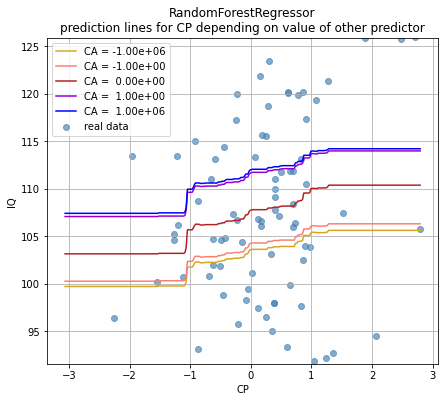

In [465]:
plot_reg_predictions(best_model, X_test, y_test, "CP")

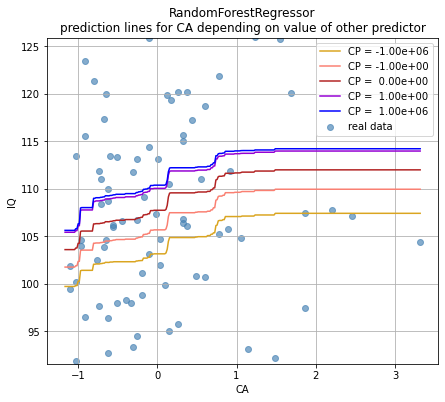

In [466]:
plot_reg_predictions(best_model, X_test, y_test, "CA")

### Gaussian processes regression

In [499]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()

gp = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)
y_pred = gp.predict(X_test)
gp.score(X_test, y_test)

0.14030030803411464

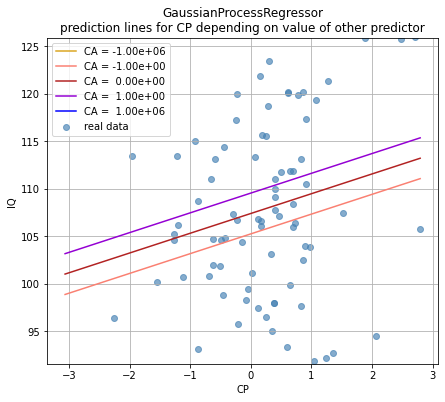

In [500]:
plot_reg_predictions(gp, X_test, y_test, "CP")

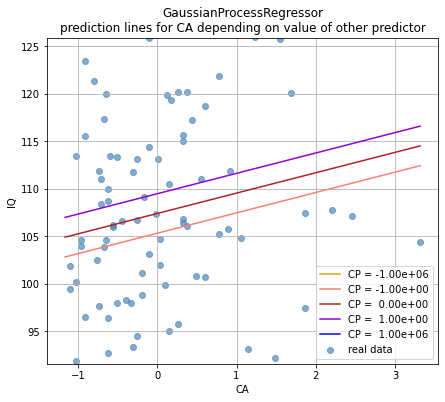

In [518]:
plot_reg_predictions(gp, X_test, y_test, "CA")

## Bayesian regression

In [137]:
from warnings import filterwarnings

filterwarnings("ignore")

#### Regression with PyMC3

Programming the model and plotting the posterior distributions.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, slope 2, slope 1, intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


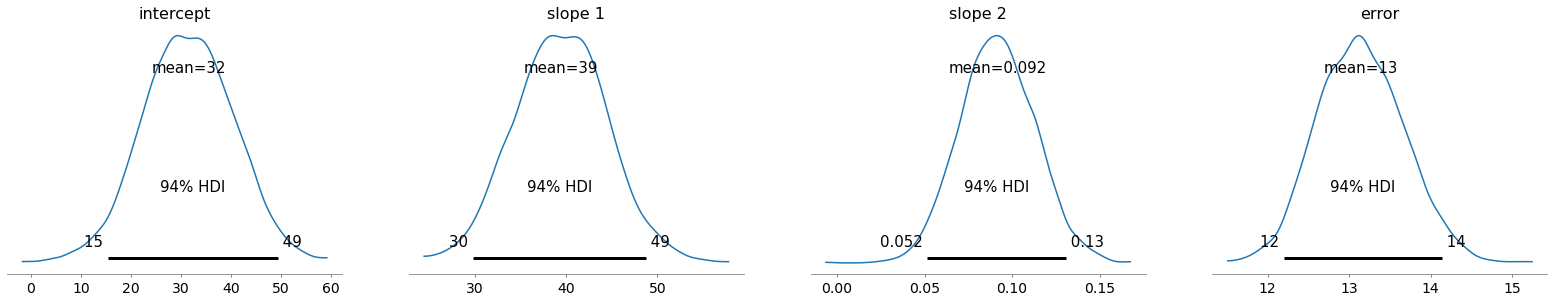

In [138]:
import pymc3 as pm
import arviz as az

y = df["IQ"]
x_1 = df["CP"]
x_2 = df["CA"]

with pm.Model() as model:
    # define priors
    b_0 = pm.Normal('intercept', 0, 16)
    b_1 = pm.Normal('slope 1', 0, 16)
    b_2 = pm.Normal('slope 2', 0, 16)
    s = pm.Exponential('error', 1)
    
    # predictions
    obs = pm.Normal('observation', b_0 + b_1*x_1 + b_2*x_2, s, observed=y)
    
    # use MCMC to sample
    trace = pm.sample(return_inferencedata=True)
    
az.plot_posterior(trace);

* We can see that the model comes to the same conclusion as the standard linear regression: Slopes of around 40 and 0.091 and an intercept of around 30. We even see that the standard error is about 13.

* We also get credible intervals 

* It seems the model is still unsure about the parameters.

* All of these distributions will narrow down further, the more data come in.

##### **Predictions**

In [139]:
with pm.Model() as predictive_model:
    # define priors
    b_0 = pm.Normal('intercept', 0, 16)
    b_1 = pm.Normal('slope 1', 0, 16)
    b_2 = pm.Normal('slope 2', 0, 16)
    s = pm.Exponential('error', 1)
    
    x_1_ = pm.Data('CP', x_1) # a data container, can be changed
    x_2_ = pm.Data('CA', x_2) # a data container, can be changed
    
    # predictions
    obs = pm.Normal('observation', b_0 + b_1*x_1 + b_2*x_2, s, observed=y)
    
    # use MCMC to sample
    trace = pm.sample(return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, slope 2, slope 1, intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
The acceptance probability does not match the target. It is 0.8986362164195026, but should be close to 0.8. Try to increase the number of tuning steps.


* use of a placeholder x_ which was initially filled with our training data x
* We then train the model, i.e. get posterior distributions for all of the parameters

##### **Pass the model new data**

In [140]:
x_1_new = np.linspace(1.1, 2.5, 297) 
x_2_new = np.linspace(-10, 218, 297) 


with predictive_model:
    pm.set_data({"CP":x_1_new,"CA": x_2_new})
    posterior = pm.sample_posterior_predictive(trace)

Posterior is a dictionary that contains the new observations.

In [141]:
x_1_new.shape

(297,)

In [142]:
y_pred = posterior['observation']
y_pred.shape

(4000, 297)

* numpy array containing 4000 observations for each of the 297 inputs in  x_1_new and x_2_new

In [143]:
y_pred[:, 0].mean()

110.60164192126891

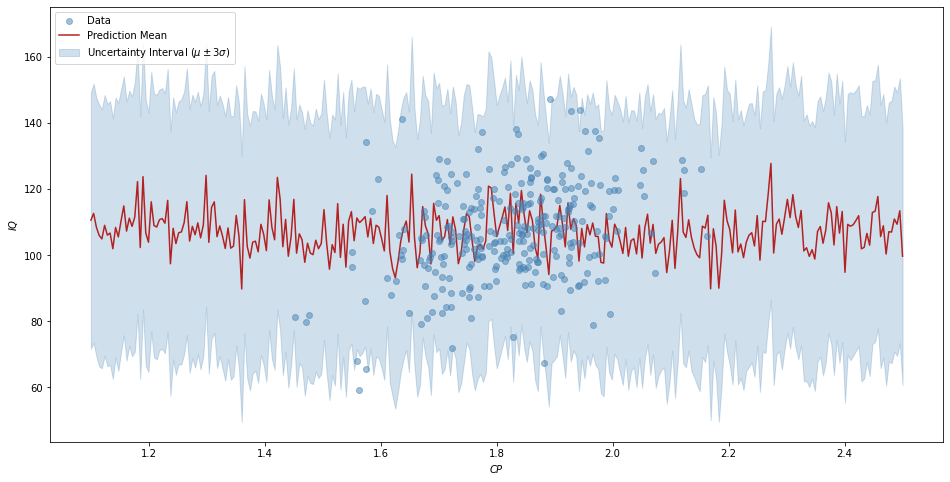

In [152]:
y_mean = y_pred.mean(axis=0)
y_std = y_pred.std(axis=0)

plt.figure(figsize=(16, 8))
plt.scatter(x_1, y, zorder=10, label='Data', color="steelblue", alpha=.5)
plt.plot(x_1_new, y_mean, label='Prediction Mean', color="firebrick")
plt.fill_between(x_1_new, y_mean - 3*y_std, y_mean + 3*y_std, alpha=0.25, label='Uncertainty Interval ($\mu\pm3\sigma$)', color="steelblue")
plt.xlabel('$CP$')
plt.ylabel('$IQ$')
plt.legend(loc='upper left');